# VAR (Vector Auto Regression) Model

## VAR(p)
## Vector Autoregression
In our previous SARIMAX example, the forecast variable $y_t$ was influenced by the exogenous predictor variable, but not vice versa. That is, the occurrence of a holiday affected restaurant patronage but not the other way around.

However, there are some cases where variables affect each other. <a href='https://otexts.com/fpp2/VAR.html'>Forecasting: Principles and Practice</a> describes a case where changes in personal consumption expenditures $C_t$ were forecast based on changes in personal disposable income $I_t$.
> However, in this case a bi-directional relationship may be more suitable: an increase in $I_t$ will lead to an increase in $C_t$ and vice versa.<br>An example of such a situation occurred in Australia during the Global Financial Crisis of 2008–2009. The Australian government issued stimulus packages that included cash payments in December 2008, just in time for Christmas spending. As a result, retailers reported strong sales and the economy was stimulated. Consequently, incomes increased.

Aside from investigating multivariate time series, vector autoregression is used for
* <a href='https://www.statsmodels.org/devel/vector_ar.html#impulse-response-analysis'>Impulse Response Analysis</a> which involves the response of one variable to a sudden but temporary change in another variable
* <a href='https://www.statsmodels.org/devel/vector_ar.html#forecast-error-variance-decomposition-fevd'>Forecast Error Variance Decomposition (FEVD)</a> where the proportion of the forecast variance of one variable is attributed to the effect of other variables
* <a href='https://www.statsmodels.org/devel/vector_ar.html#dynamic-vector-autoregressions'>Dynamic Vector Autoregressions</a> used for estimating a moving-window regression for the purposes of making forecasts throughout the data sample

### Formulation
We've seen that an autoregression AR(p) model is described by the following:

&nbsp;&nbsp;&nbsp;&nbsp; $y_{t} = c + \phi_{1}y_{t-1} + \phi_{2}y_{t-2} + \dots + \phi_{p}y_{t-p} + \varepsilon_{t}$

where $c$ is a constant, $\phi_{1}$ and $\phi_{2}$ are lag coefficients up to order $p$, and $\varepsilon_{t}$ is white noise.

A $K$-dimensional VAR model of order $p$, denoted <strong>VAR(p)</strong>, considers each variable $y_K$ in the system.<br>
​
For example, The system of equations for a 2-dimensional VAR(1) model is:

​
&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \varepsilon_{2,t}$

​
where the coefficient $\phi_{ii,l}$ captures the influence of the $l$th lag of variable $y_i$ on itself,<br>
the coefficient $\phi_{ij,l}$ captures the influence of the $l$th lag of variable $y_j$ on $y_i$,<br>
and $\varepsilon_{1,t}$ and $\varepsilon_{2,t}$ are white noise processes that may be correlated.<br>

​
Carrying this further, the system of equations for a 2-dimensional VAR(3) model is:

​
&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{11,3}y_{1,t-3} + \phi_{12,3}y_{2,t-3} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{21,3}y_{1,t-3} + \phi_{22,3}y_{2,t-3} + \varepsilon_{2,t}$<br><br>

​
and the system of equations for a 3-dimensional VAR(2) model is:

​
&nbsp;&nbsp;&nbsp;&nbsp;$y_{1,t} = c_1 + \phi_{11,1}y_{1,t-1} + \phi_{12,1}y_{2,t-1} + \phi_{13,1}y_{3,t-1} + \phi_{11,2}y_{1,t-2} + \phi_{12,2}y_{2,t-2} + \phi_{13,2}y_{3,t-2} + \varepsilon_{1,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{2,t} = c_2 + \phi_{21,1}y_{1,t-1} + \phi_{22,1}y_{2,t-1} + \phi_{23,1}y_{3,t-1} + \phi_{21,2}y_{1,t-2} + \phi_{22,2}y_{2,t-2} + \phi_{23,2}y_{3,t-2} + \varepsilon_{2,t}$<br>
&nbsp;&nbsp;&nbsp;&nbsp;$y_{3,t} = c_3 + \phi_{31,1}y_{1,t-1} + \phi_{32,1}y_{2,t-1} + \phi_{33,1}y_{3,t-1} + \phi_{31,2}y_{1,t-2} + \phi_{32,2}y_{2,t-2} + \phi_{33,2}y_{3,t-2} + \varepsilon_{3,t}$<br><br>

​
The general steps involved in building a VAR model are:
* Examine the data
* Visualize the data
* Test for stationarity
* If necessary, transform the data to make it stationary
* Select the appropriate order <em>p</em>
* Instantiate the model and fit it to a training set
* If necessary, invert the earlier transformation
* Evaluate model predictions against a known test set
* Forecast the future

In [148]:
import numpy as np
import pandas as pd

from statsmodels.tsa.api import VAR
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error

In [149]:
df = pd.read_csv("M2SLMoneyStock.csv", index_col= 0, parse_dates= True)

In [150]:
df2 = pd.read_csv("PCEPersonalSpending.csv", index_col= 0, parse_dates= True)

In [151]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [152]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [153]:
df.index.freq = "MS"

In [154]:
df.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq='MS')

In [155]:
df2.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [156]:
df2.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq=None)

In [157]:
df2.index.freq = "MS"

In [158]:
df2.index

DatetimeIndex(['1995-01-01', '1995-02-01', '1995-03-01', '1995-04-01',
               '1995-05-01', '1995-06-01', '1995-07-01', '1995-08-01',
               '1995-09-01', '1995-10-01',
               ...
               '2015-03-01', '2015-04-01', '2015-05-01', '2015-06-01',
               '2015-07-01', '2015-08-01', '2015-09-01', '2015-10-01',
               '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', length=252, freq='MS')

In [159]:
df.shape

(252, 1)

In [160]:
df2.shape

(252, 1)

In [161]:
# Joining Both Dataframes:

df = df.join(df2)

In [162]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [163]:
df.shape

(252, 2)

<AxesSubplot:xlabel='Date'>

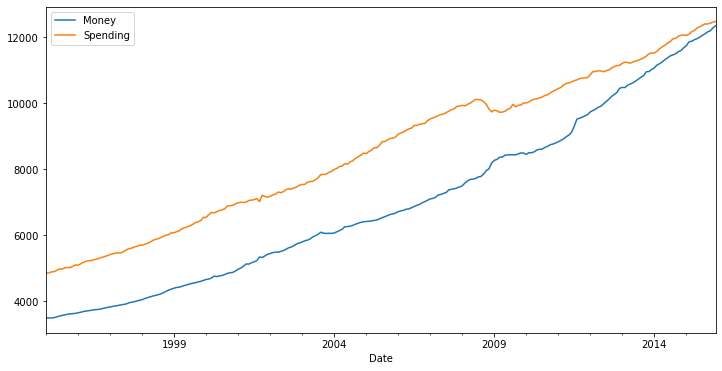

In [164]:
# Plotting Data:

df.plot(figsize=(12,6))

### ETS Decomposition:

In [165]:
decomp_money = seasonal_decompose(df["Money"], model= "additive")

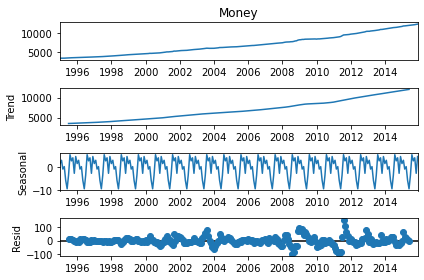

In [166]:
decomp_money.plot();

In [167]:
decomp_spend = seasonal_decompose(df["Spending"], model= "additive")

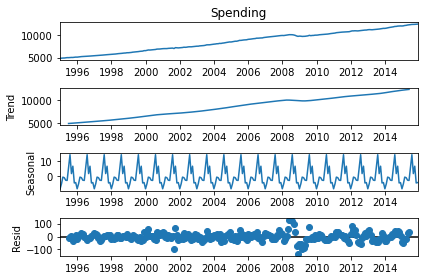

In [168]:
decomp_spend.plot();

### Stationarity Check:

In [169]:
from statsmodels.tsa.stattools import adfuller

def dickey_fuller_result(series):
    """
    Function To Perform Augmenter Dickey-Fuller Test and Display Results.
    """
    
    result= adfuller(series.dropna())
    
    labels = ["Test Statistics", "p-Value", "No. of Lags", "No. of Observations"]
    
    output = pd.Series(result[0:4], index= labels)
    
    for key,value in result[4].items():
        output[f"Critical Value {key}"] = value
        
    print(output)
    
    print("\n")
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [170]:
dickey_fuller_result(df["Money"])

Test Statistics          4.239022
p-Value                  1.000000
No. of Lags              4.000000
No. of Observations    247.000000
Critical Value 1%       -3.457105
Critical Value 5%       -2.873314
Critical Value 10%      -2.573044
dtype: float64


Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [171]:
dickey_fuller_result(df["Spending"])

Test Statistics          0.149796
p-Value                  0.969301
No. of Lags              3.000000
No. of Observations    248.000000
Critical Value 1%       -3.456996
Critical Value 5%       -2.873266
Critical Value 10%      -2.573019
dtype: float64


Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [172]:
# Applying First Order Transformation:

df_transformed = df.diff()

In [173]:
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,-2.5,-0.4
1995-03-01,1.2,34.6
1995-04-01,8.1,4.8
1995-05-01,25.0,42.9


In [174]:
dickey_fuller_result(df_transformed["Money"])

Test Statistics         -2.057404
p-Value                  0.261984
No. of Lags             15.000000
No. of Observations    235.000000
Critical Value 1%       -3.458487
Critical Value 5%       -2.873919
Critical Value 10%      -2.573367
dtype: float64


Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [175]:
dickey_fuller_result(df_transformed["Spending"])

Test Statistics       -7.226974e+00
p-Value                2.041027e-10
No. of Lags            2.000000e+00
No. of Observations    2.480000e+02
Critical Value 1%     -3.456996e+00
Critical Value 5%     -2.873266e+00
Critical Value 10%    -2.573019e+00
dtype: float64


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [176]:
# As "Money" is still not Stationary after First Order Differencin, We will apply Second Order Differencing on Both Series.

In [177]:
df_transformed = df_transformed.diff()

In [178]:
df_transformed.head()

,Money,Spending
Date,,
1995-01-01,NaN,NaN
1995-02-01,NaN,NaN
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1


In [179]:
dickey_fuller_result(df_transformed["Money"])

Test Statistics       -7.077471e+00
p-Value                4.760675e-10
No. of Lags            1.400000e+01
No. of Observations    2.350000e+02
Critical Value 1%     -3.458487e+00
Critical Value 5%     -2.873919e+00
Critical Value 10%    -2.573367e+00
dtype: float64


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [180]:
dickey_fuller_result(df_transformed["Spending"])

Test Statistics       -8.760145e+00
p-Value                2.687900e-14
No. of Lags            8.000000e+00
No. of Observations    2.410000e+02
Critical Value 1%     -3.457779e+00
Critical Value 5%     -2.873609e+00
Critical Value 10%    -2.573202e+00
dtype: float64


Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In [181]:
# Both Series are now Stationary.

In [182]:
df_transformed = df_transformed.dropna()

In [183]:
df_transformed.head()

,Money,Spending
Date,,
1995-03-01,3.7,35.0
1995-04-01,6.9,-29.8
1995-05-01,16.9,38.1
1995-06-01,-0.3,1.5
1995-07-01,-6.2,-51.7


In [184]:
df_transformed.shape

(250, 2)

### Train Test Split:

In [185]:
train_data = df_transformed[0:-12]

In [186]:
test_data = df_transformed[-12:]

In [187]:
train_data.shape

(238, 2)

In [188]:
test_data.shape

(12, 2)

### Order Selection for VAR Model:

We'll fit a series of models using the first seven p-values, and base our final selection on the model that provides the lowest AIC and BIC scores.

In [189]:
model = VAR(train_data)

In [190]:
for lag in range(1,11):
    
    result= model.fit(maxlags= lag)
    print(f"Order: {lag}")
    print(f"AIC: {result.aic}")
    print(f"BIC: {result.bic}\n")

Order: 1
AIC: 14.178610495220896
BIC: 14.266409486135709

Order: 2
AIC: 13.955189367163705
BIC: 14.101961901274958

Order: 3
AIC: 13.849518291541038
BIC: 14.055621258341116

Order: 4
AIC: 13.827950574458283
BIC: 14.093744506408877

Order: 5
AIC: 13.78730034460964
BIC: 14.113149468980652

Order: 6
AIC: 13.799076756885809
BIC: 14.185349048538068

Order: 7
AIC: 13.797638727913972
BIC: 14.244705963046671

Order: 8
AIC: 13.747200843672085
BIC: 14.255438654556384

Order: 9
AIC: 13.768071682657098
BIC: 14.337859613377889

Order: 10
AIC: 13.806012266239211
BIC: 14.43773382946766



In [191]:
# Order = 5 Seems Best Here.

### VAR(5) Model:

In [192]:
model = VAR(train_data)

In [193]:
result = model.fit(maxlags= 5)

In [194]:
result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 24, Nov, 2022
Time:                     13:59:50
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

### Prediction:

The VAR <tt>.forecast()</tt> function requires that we pass in a lag order number of previous observations as well. Unfortunately this forecast tool doesn't provide a DateTime index - we'll have to do that manually.

In [195]:
train_data.values

array([[ 3.700e+00,  3.500e+01],
       [ 6.900e+00, -2.980e+01],
       [ 1.690e+01,  3.810e+01],
       [-3.000e-01,  1.500e+00],
       [-6.200e+00, -5.170e+01],
       [ 3.100e+00,  4.240e+01],
       [-8.500e+00, -1.990e+01],
       [-1.800e+00, -2.180e+01],
       [-4.800e+00,  4.830e+01],
       [ 3.100e+00,  2.000e-01],
       [ 8.800e+00, -5.370e+01],
       [-4.400e+00,  5.890e+01],
       [ 1.110e+01, -6.600e+00],
       [-1.430e+01, -5.800e+00],
       [ 1.100e+00, -1.890e+01],
       [ 1.100e+00, -9.800e+00],
       [ 1.600e+00,  1.610e+01],
       [-7.600e+00,  1.000e+00],
       [ 2.400e+00, -1.500e+00],
       [ 7.900e+00,  1.030e+01],
       [ 1.900e+00, -9.200e+00],
       [ 1.100e+00,  4.700e+00],
       [-6.000e+00,  5.100e+00],
       [-2.700e+00, -9.600e+00],
       [ 3.300e+00, -2.700e+00],
       [ 1.200e+00, -1.510e+01],
       [-4.300e+00, -4.200e+00],
       [ 5.000e+00,  3.310e+01],
       [ 1.100e+00,  2.060e+01],
       [ 1.570e+01, -1.640e+01],
       [-1

In [196]:
train_data.values[-5:]

array([[-31.9,  40.3],
       [  5.6, -70.7],
       [ 25.5,  52.5],
       [-21.3, -37.2],
       [ 39.5, -17.8]])

In [197]:
diff_forecast = result.forecast(y= train_data.values[-5:], steps= 12)

In [198]:
diff_forecast

array([[-16.99527634,  36.14982003],
       [ -3.17403756, -11.45029844],
       [ -0.377725  ,  -6.68496939],
       [ -2.60223305,   5.47945777],
       [  4.228557  ,  -2.44336505],
       [  1.55939341,   0.38763902],
       [ -0.99841027,   3.88368011],
       [  0.36451042,  -2.3561014 ],
       [ -1.21062726,  -1.22414652],
       [  0.22587712,   0.786927  ],
       [  1.33893884,   0.18097449],
       [ -0.21858453,   0.21275046]])

In [199]:
# We will have to Store These Forecat values in DataFrame.
# Dataframe of Forecast values should have Same Date Index as Test Data.

In [200]:
test_data.head()

,Money,Spending
Date,,
2015-01-01,-15.5,-26.6
2015-02-01,56.1,52.4
2015-03-01,-102.8,39.5
2015-04-01,30.9,-40.4
2015-05-01,-15.8,38.8


In [201]:
test_data.index

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', name='Date', freq='MS')

In [202]:
ind = pd.date_range(start= "2015-01-01", periods= 12, freq= "MS")

In [203]:
ind

DatetimeIndex(['2015-01-01', '2015-02-01', '2015-03-01', '2015-04-01',
               '2015-05-01', '2015-06-01', '2015-07-01', '2015-08-01',
               '2015-09-01', '2015-10-01', '2015-11-01', '2015-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [204]:
forecast_df = pd.DataFrame(data= diff_forecast, index= ind, columns= ["Money_diff_2", "Spending_diff_2"])

In [205]:
forecast_df

,Money_diff_2,Spending_diff_2
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


### Invert the Transformation
Remember that the forecasted values represent second-order differences. To compare them to the original data we have to roll back each difference. To roll back a first-order difference we take the most recent value on the training side of the original series, and add it to a cumulative sum of forecasted values. When working with second-order differences we first must perform this operation on the most recent first-order difference.

Here we'll use the <tt>nobs</tt> variable we defined during the train/test/split step.

In [206]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecast_df['Money_diff_1'] = (df['Money'].iloc[-12-1]-df['Money'].iloc[-12-2]) + forecast_df['Money_diff_2'].cumsum()

In [207]:
# Now build the forecast values from the first difference set
forecast_df['Money_Forecast'] = df['Money'].iloc[-12-1] + forecast_df['Money_diff_1'].cumsum()

In [208]:
# Add the most recent first difference from the training side of the original dataset to the forecast cumulative sum
forecast_df['Spending_diff_1'] = (df['Spending'].iloc[-12-1]-df['Spending'].iloc[-12-2]) + forecast_df['Spending_diff_2'].cumsum()

In [209]:
# Now build the forecast values from the first difference set
forecast_df['Spending_Forecast'] = df['Spending'].iloc[-12-1] + forecast_df['Spending_diff_1'].cumsum()

In [210]:
forecast_df

,Money_diff_2,Spending_diff_2,Money_diff_1,Money_Forecast,Spending_diff_1,Spending_Forecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549
2015-06-01,1.559393,0.387639,61.238678,12024.557062,32.038284,12270.446833
2015-07-01,-0.998410,3.883680,60.240268,12084.797331,35.921964,12306.368797
2015-08-01,0.364510,-2.356101,60.604779,12145.402109,33.565863,12339.934659
2015-09-01,-1.210627,-1.224147,59.394151,12204.796261,32.341716,12372.276375
2015-10-01,0.225877,0.786927,59.620028,12264.416289,33.128643,12405.405019


<AxesSubplot:xlabel='Date'>

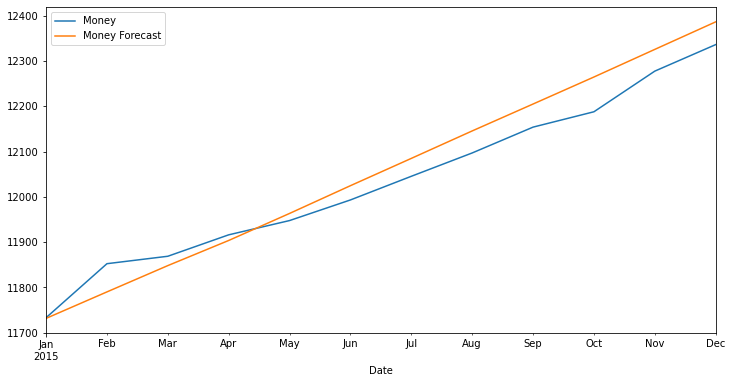

In [211]:
# Plotting Forecast Against Original Data:

df["Money"][-12:].plot(figsize= (12,6), legend= True)
forecast_df["Money_Forecast"].plot(label= "Money Forecast", legend= True)

<AxesSubplot:xlabel='Date'>

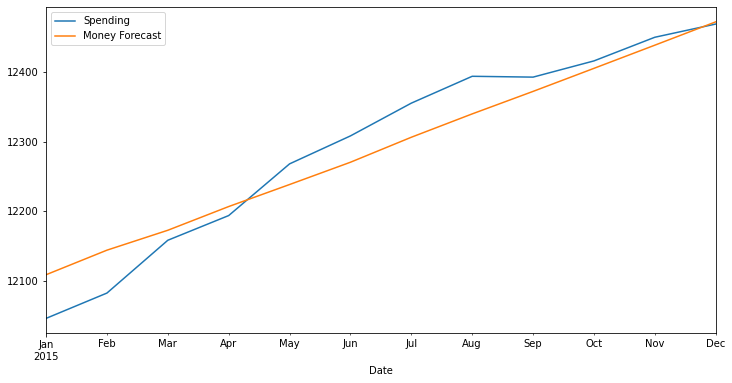

In [212]:
df["Spending"][-12:].plot(figsize= (12,6), legend= True)
forecast_df["Spending_Forecast"].plot(label= "Money Forecast", legend= True)

In [213]:
# Evaluating Model:

np.sqrt(mean_squared_error(df["Money"][-12:], forecast_df["Money_Forecast"]))

43.71049653558938

In [214]:
np.sqrt(mean_squared_error(df["Spending"][-12:], forecast_df["Spending_Forecast"]))

37.00117516940808